## Library Imports and Data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_data = pd.read_csv('../input/dmart-products/DMart.csv')

## General Analysis

In [3]:
project_data.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [4]:
project_data.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


In [5]:
project_data.columns

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs'],
      dtype='object')

In [6]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [7]:
project_data.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


## Missing Value Analysis

In [8]:
project_data.isna().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

In [9]:
project_data.shape

(5189, 9)

In [10]:
project_data['Brand'] = project_data['Brand'].fillna('others')

In [11]:
project_data.isna().sum()

Name               1
Brand              0
Price              1
DiscountedPrice    1
Category           3
SubCategory        3
Quantity           1
Description        2
BreadCrumbs        3
dtype: int64

In [12]:
project_data = project_data.dropna()
project_data.isna().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

## Bivariate & univariate EDA

others          399
Premia          155
Faces Canada     99
Insight          82
Amul             79
Lakme            74
Satyam           68
Gillette         44
Britannia        42
Lotus            40
Name: Brand, dtype: int64

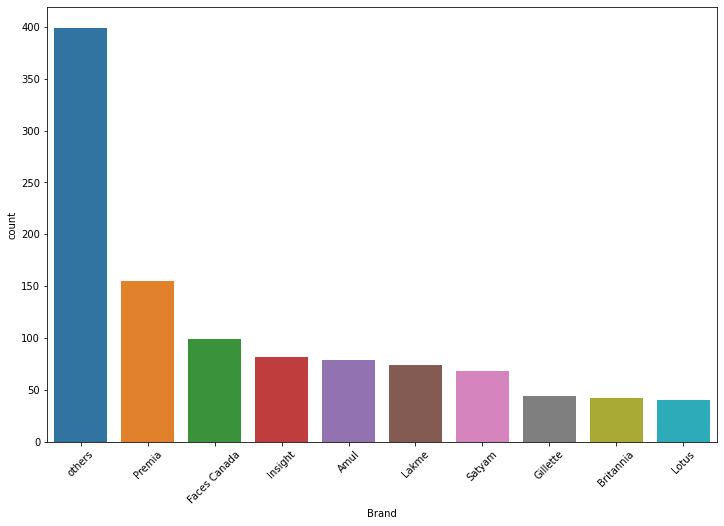

In [13]:
plt.figure(figsize=(12,8))
chart = sns.countplot(x="Brand", data=project_data, order=pd.value_counts(project_data['Brand']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
project_data['Brand'].value_counts().head(10)

60.0     118
150.0    110
50.0     107
99.0      91
70.0      86
299.0     81
199.0     77
55.0      76
499.0     74
90.0      73
Name: Price, dtype: int64

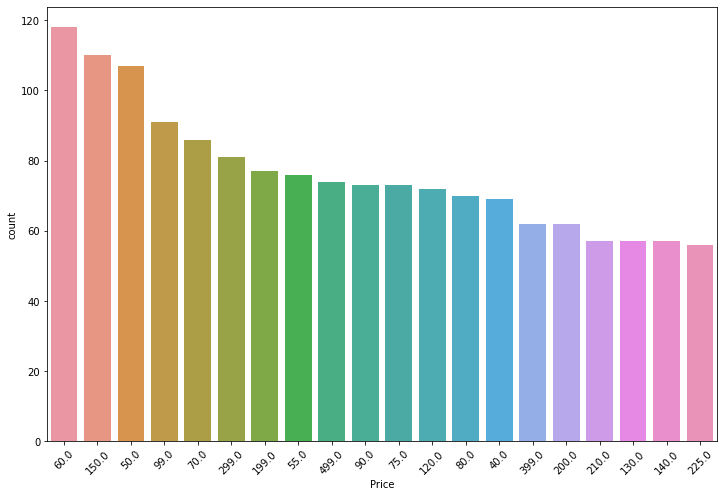

In [14]:
plt.figure(figsize=(12,8))
chart = sns.countplot(x="Price", data=project_data, order=pd.value_counts(project_data['Price']).iloc[:20].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
project_data['Price'].value_counts().head(10)

Personal Care             1233
Packaged Food             1124
Home & Kitchen             879
Grocery                    840
Dairy & Beverages          429
Specials                   187
Clothing & Accessories      97
Fruits & Vegetables         78
School Supplies             69
Appliances                  53
Name: Category, dtype: int64

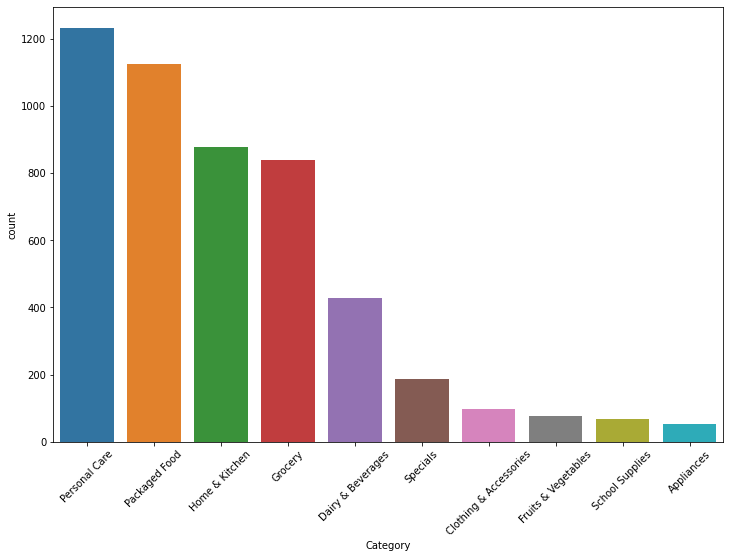

In [15]:
plt.figure(figsize=(12,8))
chart = sns.countplot(x="Category", data=project_data, order=pd.value_counts(project_data['Category']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
project_data['Category'].value_counts().head(10)

<Figure size 864x576 with 0 Axes>

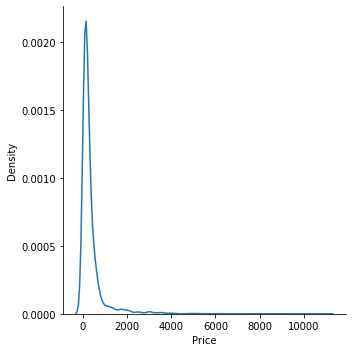

In [16]:
plt.figure(figsize=(12,8))
sns.displot(project_data, x="Price", kind="kde")

<Figure size 864x576 with 0 Axes>

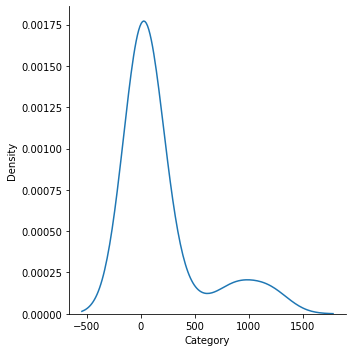

In [17]:
plt.figure(figsize=(12,8))
sns.displot(project_data, x=project_data["Category"].value_counts(), kind="kde")

<Figure size 864x576 with 0 Axes>

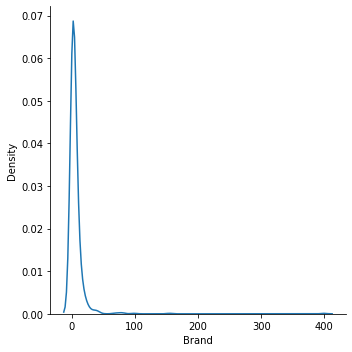

In [18]:
plt.figure(figsize=(12,8))
sns.displot(project_data, x=project_data["Brand"].value_counts(), kind="kde")

In [19]:
brand_price = {}
def brand_and_top_price():
    for index, row in project_data.iterrows():
        if row["Brand"] in brand_price:
            if brand_price.get(row["Brand"]) < row["Price"]:
                brand_price[row["Brand"]] = row["Price"]
        else:
            brand_price[row["Brand"]] = row["Price"]
            
brand_and_top_price()

brand_price = dict(sorted(brand_price.items(), key=lambda item: item[1], reverse=True))

,0,1
0,Philips,10990.0
1,Bathla,8999.0
2,Godrej,7669.0
3,Bajaj,6275.0
4,Wonderchef,6100.0
5,Morphy Richards,6095.0
6,Portronics,5999.0
7,Crompton Greaves,5600.0
8,Borges,5500.0
9,Boat,4990.0


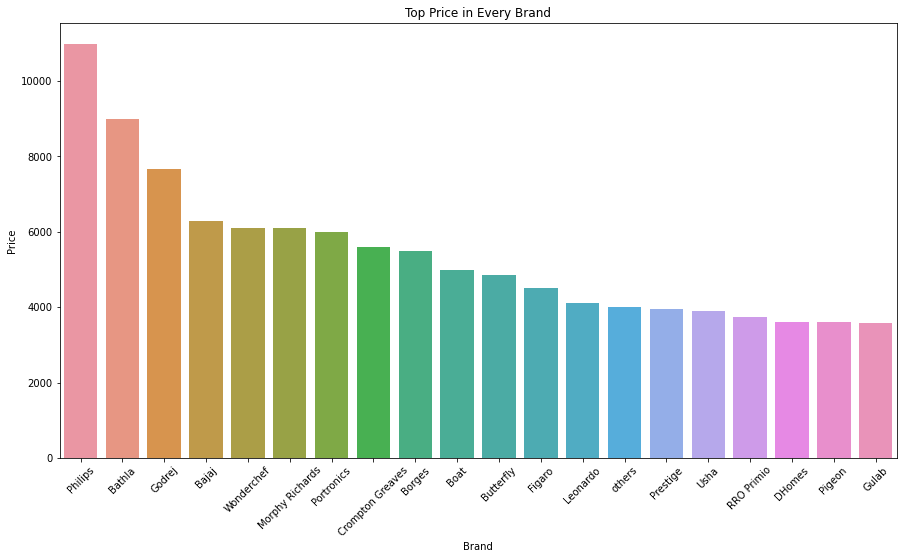

In [20]:
my_df = pd.DataFrame(brand_price.items())[:20]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=0, y=1, data=my_df)
ax.set(xlabel = 'Brand', ylabel='Price', title='Top Price in Every Brand')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
my_df.head(20)

In [21]:
category_price = {}
def category_and_top_price():
    for index, row in project_data.iterrows():
        if row["Category"] in category_price:
            if category_price.get(row["Category"]) < row["Price"]:
                category_price[row["Category"]] = row["Price"]
        else:
            category_price[row["Category"]] = row["Price"]
            
category_and_top_price()

category_price = dict(sorted(category_price.items(), key=lambda item: item[1], reverse=True))

,0,1
0,Home & Kitchen,10990.0
1,Appliances,6275.0
2,Smartwatches,5999.0
3,Grocery,5500.0
4,Wonderchef,5300.0
5,Specials,4990.0
6,Butterfly,4851.0
7,Pigeon,3595.0
8,Backpacks,3500.0
9,School Supplies,2699.0


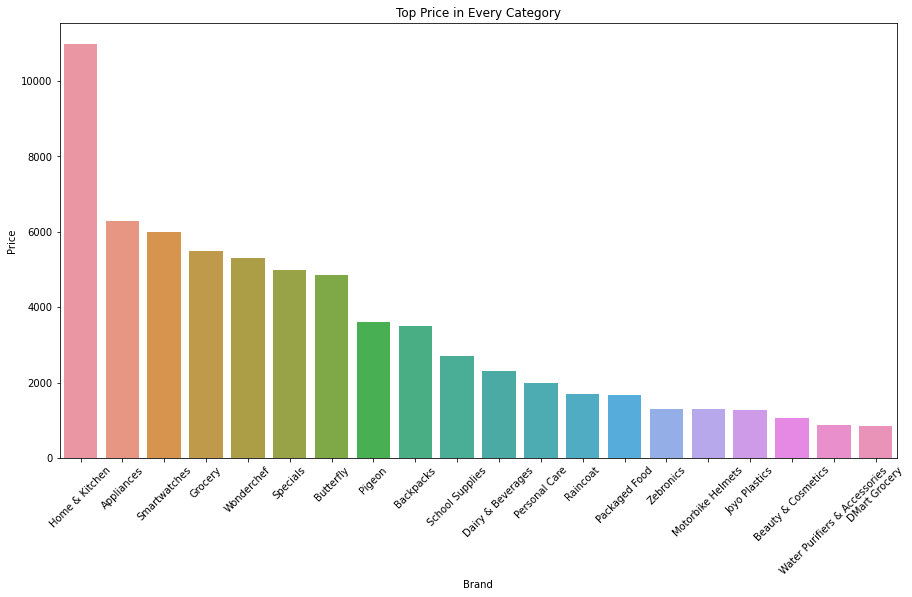

In [22]:
my_df = pd.DataFrame(category_price.items())[:20]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=0, y=1, data=my_df)
ax.set(xlabel = 'Brand', ylabel='Price', title='Top Price in Every Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
my_df.head(20)

In [23]:
project_data.groupby(by=["SubCategory","Quantity"], dropna=False, sort=True).sum().head(20)

Price  DiscountedPrice
SubCategory Quantity                         
Appliances  1 U       3028.0           1150.0
            1 Unit     331.0            249.0
            4 Unit     190.0            170.0
Baby & Kids 10 U      2275.0           1698.0
            100 ml     138.0             90.0
            120 U     3148.0           2098.0
            125 gm      80.0             65.0
            200 ml     470.0            325.0
            24 U       210.0            178.0
            28 U       799.0            599.0
            2x75 gm    249.0            199.0
            30 U       399.0            298.0
            300 gm     864.0            864.0
            34 U      1198.0            898.0
            36 U      1149.0            810.0
            3x150 gm   345.0            285.0
            3x75 gm    160.0            135.0
            40 U       699.0            495.0
            400 gm     495.0            380.0
            400 ml    1917.0           1377.0

<AxesSubplot:xlabel='Price', ylabel='Density'>

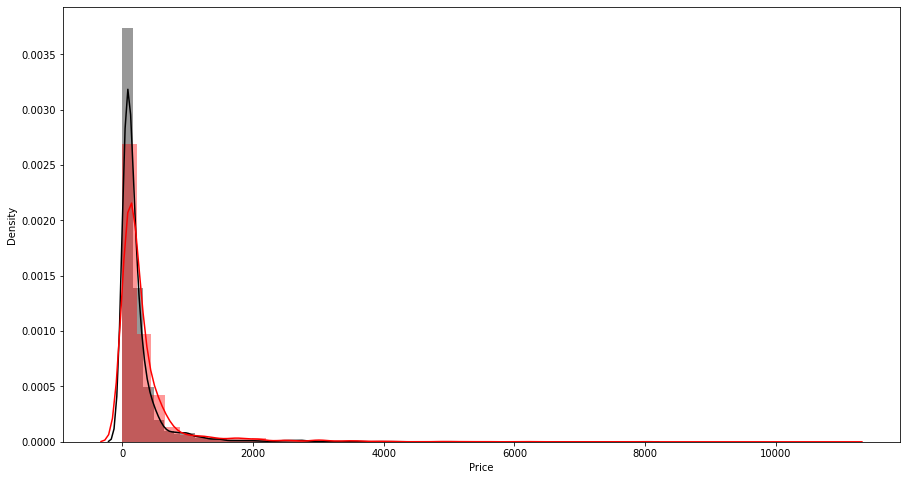

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(project_data["DiscountedPrice"],color='black')
sns.distplot(project_data["Price"],color='red')